In [1]:
import torch as tr
import numpy as np
from matplotlib import pyplot as plt
#
import sys

In [2]:
print('python version:',sys.version)
print('torch version:',tr.__version__)

python version: 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
torch version: 1.9.0


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Fri_Dec_17_18:28:54_Pacific_Standard_Time_2021
Cuda compilation tools, release 11.6, V11.6.55
Build cuda_11.6.r11.6/compiler.30794723_0


In [4]:
# Number of samples
Ns = 20 # 5 10 20
# Number of hidden neurons
Nn = 10 # 5 7 10
# EPOCH
EPOCH = 20000

In [5]:
def y_func(x):
    aux = 200*x**3 - 260*x**2 + 94*x - 7
    return aux

**ANN definition**

In [6]:
# Fixed initial weights
tr.manual_seed(42)
# ANN definition
ANN = tr.nn.Sequential(
    tr.nn.Linear(1,Nn),
    tr.nn.Sigmoid(),
    #tr.nn.Linear(Nn,Nn),
    #tr.nn.Sigmoid(),
    tr.nn.Linear(Nn,1)
)
# See initial weights and ANN structure
ANN.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]])),
             ('0.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549])),
             ('2.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123]])),
             ('2.bias', tensor([0.2856]))])

**Training set**

(0.0, 1.0)

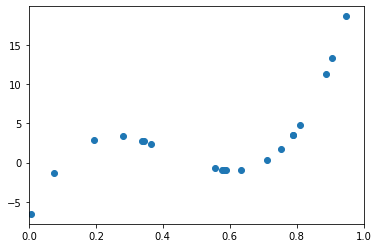

In [7]:
X_train = tr.rand(Ns,1)
Y_train = y_func(X_train)
plt.plot(X_train,Y_train,'o')
plt.xlim(0,1)

In [8]:
optimizer = tr.optim.Adam(ANN.parameters(), lr=3e-3)

In [9]:
for epoch in range(EPOCH):
    y_hat = ANN(X_train)
    loss = tr.mean(tr.pow(y_hat - Y_train,2))
    #
    optimizer.zero_grad()
    #
    loss.backward()
    #
    optimizer.step()
    #
    if epoch % 100 == 0:
        print('epoch:', epoch, 'loss:', loss.item())

epoch: 0 loss: 41.33256530761719
epoch: 100 loss: 32.14905548095703
epoch: 200 loss: 29.90590476989746
epoch: 300 loss: 29.271930694580078
epoch: 400 loss: 28.507816314697266
epoch: 500 loss: 27.46860694885254
epoch: 600 loss: 26.12188148498535
epoch: 700 loss: 24.54000473022461
epoch: 800 loss: 22.88744354248047
epoch: 900 loss: 21.331470489501953
epoch: 1000 loss: 19.979633331298828
epoch: 1100 loss: 18.862503051757812
epoch: 1200 loss: 17.948551177978516
epoch: 1300 loss: 17.17733383178711
epoch: 1400 loss: 16.490324020385742
epoch: 1500 loss: 15.845804214477539
epoch: 1600 loss: 15.219823837280273
epoch: 1700 loss: 14.601460456848145
epoch: 1800 loss: 13.98779582977295
epoch: 1900 loss: 13.380392074584961
epoch: 2000 loss: 12.783023834228516
epoch: 2100 loss: 12.200304985046387
epoch: 2200 loss: 11.636739730834961
epoch: 2300 loss: 11.096071243286133
epoch: 2400 loss: 10.580934524536133
epoch: 2500 loss: 10.092788696289062
epoch: 2600 loss: 9.632071495056152
epoch: 2700 loss: 9.198

In [10]:
X_test = tr.reshape(tr.linspace(0,1,100),(100,1))
Y_test = y_func(X_test)
Y_hat_test = ANN(X_test)

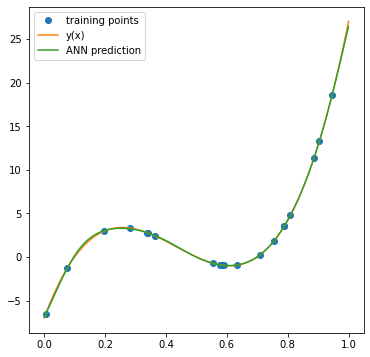

In [12]:
plt.figure(figsize=(6,6))
plt.plot(X_train,Y_train,'o',label='training points')
plt.plot(X_test,Y_test,label='y(x)')
plt.plot(X_test,Y_hat_test.detach().numpy(),label='ANN prediction')
plt.legend()
plt.show()